In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
plt.style.use('seaborn')

<ipython-input-1-ed55d6174f43>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
l = 1
g = 9.8
T = 2 * np.pi * ((l/g) ** (1/2))
print(T)

2.007089923154493


In [ ]:
theta0,v0 = np.radians(60),0
theta, v = [theta0], [v0]
dt = 0.001
i = 0
while True:
  i += 1
  t = i*dt
  old_theta, old_v = theta[-1], v[-1]
  omega = old_v/l
  new_theta = old_theta + omega * dt
  acc = g * np.sin(old_theta)
  new_v = old_v + acc * t
  if t > T and new_v * old_v < 0:
    break
  theta.append(new_theta)
  v.append(new_v)

In [ ]:
v[-1], theta[-1]

(2212.7752677068906, 753384.1507802026)

(-1.2, 1.2)

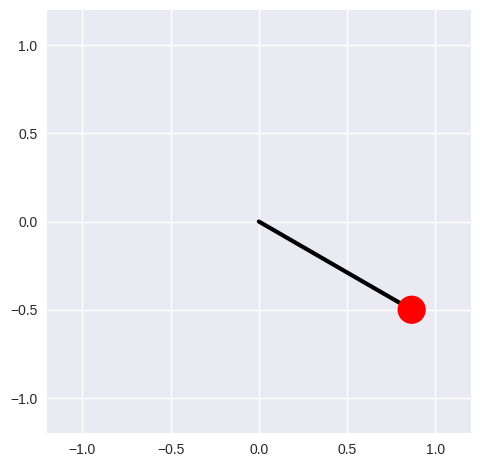

In [ ]:
def getCords(th):
  return l*np.sin(th), -l*np.cos(th)
fig = plt.figure()
ax = fig.add_subplot(aspect = 'equal')
x0,y0 = getCords(theta0)
line, = ax.plot([0,x0], [0,y0], lw = 3, c = 'k')
objred = 0.08
circle = ax.add_patch(plt.Circle(getCords(theta0), objred, fc = 'r', zorder = 3))
ax.set_xlim(-l * 1.2, l*1.2)
ax.set_ylim(-l * 1.2, l * 1.2)


In [ ]:
def animate(i):
  x,y = getCords(theta[i])
  line.set_data([0,x], [0,y])
  circle.set_center((x,y))

In [ ]:
nframes = len(theta)
interval = dt * 1000
ani = animation.FuncAnimation(fig,animate, frames = nframes, repeat = True, interval = interval)
HTML(ani.to_html5_video())